In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random
import re
import seaborn as sns
from sklearn.metrics import confusion_matrix
from zipfile import ZipFile
from glob import glob
from google.colab import drive
from keras.models import Sequential
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras import datasets, layers, optimizers
from tensorflow.keras.layers import Dropout,GlobalAveragePooling2D, Dense
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adagrad
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import auc
from tensorflow.keras.applications import MobileNetV2

"""# Extract the images and clasiffing into 3 categories
# (healthy, virus, bacterial)
"""

drive.mount('/content/drive')

file_name = '/content/drive/My Drive/Final Project DL & ML/chest-xray.zip'

with ZipFile(file_name, 'r') as zip_file:
  zip_file.extractall()  # Extract all contents of the ZIP file.
  print('Done')

train_path = '/content/chest_xray/chest_xray/train'
val_path = '/content/chest_xray/chest_xray/val'
test_path = '/content/chest_xray/chest_xray/test'

pre_path = '/content/chest_xray/chest_xray/'

# Define paths for different sets and classes.
train_normal_dir = pre_path + 'train/NORMAL/'
train_pneu_dir = pre_path + 'train/PNEUMONIA/'

test_normal_dir = pre_path + 'test/NORMAL/'
test_pneu_dir = pre_path + 'test/PNEUMONIA/'

val_normal_dir = pre_path + 'val/NORMAL/'
val_pneu_dir = pre_path + 'val/PNEUMONIA/'


#initiazing the healthy, bacteria and virus cases of the images
virus = [] #1493 images total
bacteria = [] #2780 images total
healthy = [] #1583 images total

healthy += glob(train_normal_dir + '*jpeg')

#By using Regular Expressions we sorting the cases properly
#0- healthy, 1- virus case, 2 - bacteria case
for i in os.listdir(train_pneu_dir):
  if(re.search("virus.*jpeg", i)):
      virus.append([train_pneu_dir+i,1])
  elif(re.search("bacteria.*jpeg", i)):
      bacteria.append([train_pneu_dir+i,2])

healthy += glob(test_normal_dir + '*jpeg')

for i in os.listdir(test_pneu_dir):
  if(re.search("virus.*jpeg", i)):
      virus.append([test_pneu_dir+i,1])
  elif(re.search("bacteria.*jpeg", i)):
      bacteria.append([test_pneu_dir+i,2])

healthy += glob(val_normal_dir + '*jpeg')

for i in os.listdir(val_pneu_dir):
  if(re.search("virus.*jpeg", i)):
      virus.append([val_pneu_dir+i,1])
  elif(re.search("bacteria.*jpeg", i)):
      bacteria.append([val_pneu_dir+i,2])

for i in range(len(healthy)):
  healthy[i]=(healthy[i],0)

for lst in [healthy,virus,bacteria]:
  random.shuffle(lst)


"""# Creating the test, train and validation sets"""
# # 15% validation(878) and 20% test sets(1172), 65% train set from all data(3806)
# # Splitting data into train, validation, and test sets

val = virus[:250] + bacteria[:450] + healthy[:178]
test = virus[250:500] + bacteria[450:900] + healthy[178:650]
train = virus[500:] + bacteria[900:] + healthy[650:]

def NormalPixels(data):
    # Normalize the pixels on every image and label
    normal = []
    labels = []

    for im_path,label in data:
        # Assigning labels based on the type of pneumonia
        if label == 2:
            labels.append(1)  # Label 1 for bacteria pneumonia
        else:
            labels.append(label)

       # Open the image and convert it to RGB
        image = Image.open(im_path).convert("RGB")

        # Resize the image to 180x180
        resized_image = image.resize((180, 180))

        # Convert the resized image to a NumPy array
        image_array = np.array(resized_image)

        # Normalize the pixel values
        im_normal = image_array / 255.0

        normal.append(im_normal)

    return np.array(normal), np.array(labels)

def CreatingtVal(val):
    val_norm, val_label = NormalPixels(val)  # Normalize validation data
    return val_norm, val_label

def CreatingtTrain(train):
    train_norm, train_label = NormalPixels(train)  # Normalize training data
    return train_norm, train_label

def CreatingtTest(test):
    test_norm, test_label = NormalPixels(test)  # Normalize test data
    return test_norm, test_label

val_norm, val_label = CreatingtVal(val)
train_norm, train_label = CreatingtTrain(train)
test_norm, test_label = CreatingtTest(test)



Mounted at /content/drive
Done


Training CNN with SGD: learning rate: 0.0001, epochs: 50


<ipython-input-3-e7507542f6d4>:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(180, 180, 3), include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=None)


Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.3963 - loss: 0.7734 - val_accuracy: 0.7973 - val_loss: 0.5840
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7566 - loss: 0.5903 - val_accuracy: 0.7973 - val_loss: 0.5301
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7670 - loss: 0.5523 - val_accuracy: 0.7973 - val_loss: 0.5160
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7498 - loss: 0.5621 - val_accuracy: 0.7973 - val_loss: 0.5092
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7538 - loss: 0.5558 - val_accuracy: 0.7973 - val_loss: 0.5074
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7536 - loss: 0.5587 - val_accuracy: 0.7973 - val_loss: 0.5068
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7603 - loss: 0.5509 - val_accuracy: 0.7973 - val_loss: 0.5072
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7678 - loss: 0.5404 - val_accur

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_2 (TrueDivide)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract_2 (Subtract)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 6, 6, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 6, 6, 32)            │         368,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 1, 1, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,719,139 (10.37 MB)

 Trainable params: 461,153 (1.76 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

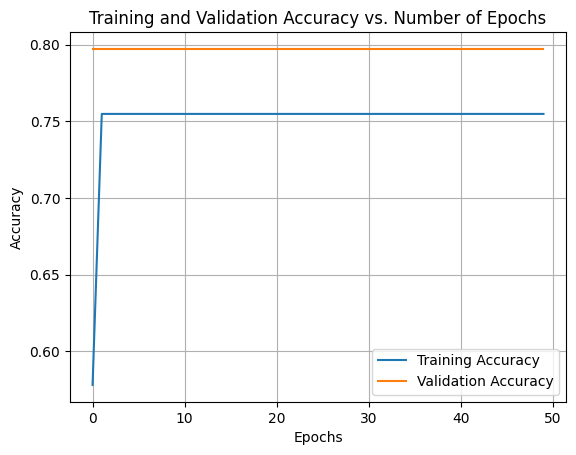

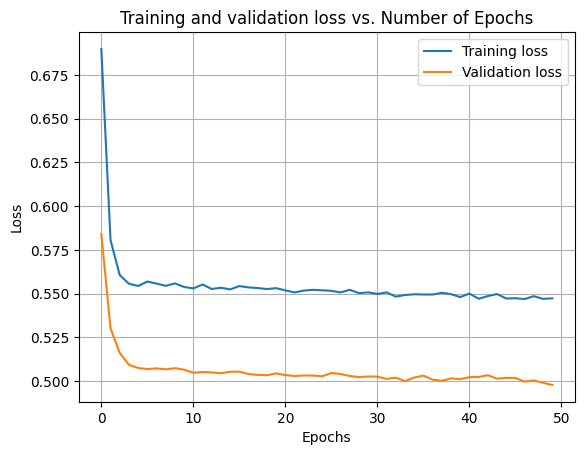

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8887 - loss: 0.3939

Test accuracy:  0.5972696542739868

Test loss:  0.7251779437065125
Training CNN with SGD: learning rate: 0.0001, epochs: 80
Epoch 1/80
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.7495 - loss: 0.6286 - val_accuracy: 0.7973 - val_loss: 0.5429
Epoch 2/80
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7618 - loss: 0.5649 - val_accuracy: 0.7973 - val_loss: 0.5195
Epoch 3/80
 78/191 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7525 - loss: 0.5632

KeyboardInterrupt: 

In [3]:
"""# Building the Transfer Learning model"""
# Build the model
test_accs = []
test_loss_accs = []
epochs = [50,80]
learning_rates = [0.001]

for lr in learning_rates:
  for epoch in epochs:
        print(f"Training CNN with SGD: learning rate: {lr}, epochs: {epoch}")
        base_model = tf.keras.applications.MobileNetV2(input_shape=(180, 180, 3), include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=None)
        base_model.trainable = False

        preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
        global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
        prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')

        inputs = tf.keras.Input(shape=(180, 180, 3))
        x = preprocess_input(inputs)
        x = base_model(x, training=False)

        # Additional layers
        x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = tf.keras.layers.MaxPooling2D((2, 2))(x)
        x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = tf.keras.layers.MaxPooling2D((2, 2))(x)
        x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

        x = global_average_layer(x)
        x = tf.keras.layers.Dropout(0.1)(x)
        outputs = prediction_layer(x)

        transfer_learning = tf.keras.Model(inputs, outputs)

        # Compile the model
        transfer_learning.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
                           loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                           metrics=['accuracy'])

        history = transfer_learning.fit(train_norm, train_label, epochs=epoch, batch_size=20,
                                validation_data=(val_norm, val_label), verbose=1)

        transfer_learning.summary()

        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Training and Validation Accuracy vs. Number of Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.legend(loc='lower right')
        plt.show()

        plt.clf() # clear figure
        plt.plot(history.history['loss'], label='Training loss')

        plt.plot(history.history['val_loss'], label='Validation loss')
        plt.title('Training and validation loss vs. Number of Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid()
        plt.legend(loc='upper right')
        plt.show()

        # Evaluate the model on the test set
        test_loss, test_acc = transfer_learning.evaluate(test_norm, test_label, verbose=1)
        print("\nTest accuracy: ", test_acc)
        print("\nTest loss: ", test_loss)